# News Mood

### Analysis
* I must have ran the tweets on a really bad day since all the compound average scores were in the Negative. 
* Fox News was the most neutral network based on average compound score. 
* BBC World was an interesting case.. after seeing such a negative score I reviewed some tweets to understand why this was the case.. at the time all the "WORLD NEWS" they were talking about primarily dealt with war AND crimes. Other BBC handles seemed to focus on so many different topics. 

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time


In [2]:
# Twitter items
from apikeys import consumer_key, consumer_secret, access_token, access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())



In [3]:
networks = ["BBCWorld", "CBSNews", "CNN", "FoxNews",  "nytimes"]

networks_data = {
    "network_source": [],
    "tweet": [],
    "date": [],
    "compound_score": [],
    "neg_score": [],
    "pos_score": [],
    "neu_score": []}

# Grab 100 tweets from each network 
for x in range(5):

    # Loop through all news sources
    for network in networks:

        # Grab the tweets
        tweets = api.user_timeline(network, page=x)

        # For each tweet store it into the dictionary
        for tweet in tweets:

            # All data is grabbed from the JSON returned by Twitter
            networks_data["network_source"].append(tweet["user"]["name"])
            networks_data["tweet"].append(tweet["text"])
            networks_data["date"].append(tweet["created_at"])

            # Run sentiment analysis on each tweet using Vader
            networks_data["compound_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            networks_data["pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            networks_data["neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            networks_data["neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])



In [4]:
# Store the final contents into a DataFrame
sentiment_df = pd.DataFrame(networks_data, 
                        columns=["network_source", 
                                 "tweet", 
                                 "date",
                                 "compound_score",
                                 "pos_score",
                                 "neu_score",
                                 "neg_score"]
                       )

# # Export to CSV
# file_name = str(time.strftime("%m-%d-%y")) + "-tweets.csv"
# tweet_df.to_csv("analysis/" + file_name, encoding="utf-8")

# Dataframe results
sentiment_df.head(20)
# print(sentiment_df.count())

network_source                                              tweet  \
0   BBC News (World)  RT @BBCSport: The draw has been made for the C...   
1   BBC News (World)  RT @BBCSport: You know how Roma wanted to avoi...   
2   BBC News (World)  RT @BBCSport: It's almost time for the #UCLDra...   
3   BBC News (World)  RT @BBC_HaveYourSay: The Pakistan PM has been ...   
4   BBC News (World)  Carl Bernstein: Trump attacks 'degenerate' Wat...   
5   BBC News (World)  South Africa violence targets Soweto's foreign...   
6   BBC News (World)  Burst dam floods 85 villages in central Myanma...   
7   BBC News (World)  China officials 'faked water tests with bottle...   
8   BBC News (World)  Why confidence in Argentina's economy is dwind...   
9   BBC News (World)  Mystery woman, caught on surveillance camera w...   
10  BBC News (World)  Google disputes Trump's claim that it didn't p...   
11  BBC News (World)  Calls to name Nato headquarters after US Senat...   
12  BBC News (World)  Dutroux murders: Belgian child-killer's letter...   
13  BBC News (World)  Roy Oliver: Ex-police officer jailed for Jorda...   
14  BBC News (World)                          😲 https://t.co/4Y2uJNEHMN   
15  BBC News (World)  RT @BBCAfrica: “What is wrong about sex anyway...   
16  BBC News (World)  Macron: French 'Gauls' resistant to change, un...   
17  BBC News (World)  RT @BBCNews: Prince Harry sings King George's ...   
18  BBC News (World)  RT @BBCMonitoring: Profiles of key militia gro...   
19  BBC News (World)  RT @BBCNews: Chequers deal "delivers on the #B...   

                              date  compound_score  pos_score  neu_score  \
0   Thu Aug 30 17:23:46 +0000 2018          0.5267      0.175      0.825   
1   Thu Aug 30 16:45:56 +0000 2018         -0.2960      0.000      0.913   
2   Thu Aug 30 16:18:06 +0000 2018          0.1027      0.069      0.931   
3   Thu Aug 30 15:52:58 +0000 2018          0.0000      0.000      1.000   
4   Thu Aug 30 15:01:39 +0000 2018         -0.4404      0.000      0.707   
5   Thu Aug 30 14:12:04 +0000 2018         -0.6249      0.000      0.631   
6   Thu Aug 30 13:59:27 +0000 2018          0.0000      0.000      1.000   
7   Thu Aug 30 13:36:44 +0000 2018          0.0000      0.000      1.000   
8   Thu Aug 30 13:09:08 +0000 2018          0.5106      0.320      0.680   
9   Thu Aug 30 12:47:02 +0000 2018          0.3182      0.251      0.605   
10  Thu Aug 30 12:43:22 +0000 2018         -0.5080      0.000      0.752   
11  Thu Aug 30 12:27:02 +0000 2018          0.0000      0.000      1.000   
12  Thu Aug 30 12:22:48 +0000 2018         -0.8074      0.000      0.451   
13  Thu Aug 30 12:19:55 +0000 2018         -0.4939      0.000      0.738   
14  Thu Aug 30 11:50:22 +0000 2018          0.0000      0.000      1.000   
15  Thu Aug 30 10:58:15 +0000 2018         -0.4767      0.000      0.871   
16  Thu Aug 30 10:57:38 +0000 2018          0.0000      0.000      1.000   
17  Thu Aug 30 10:51:36 +0000 2018          0.4215      0.167      0.833   
18  Thu Aug 30 10:49:14 +0000 2018          0.0000      0.000      1.000   
19  Thu Aug 30 10:37:25 +0000 2018          0.4404      0.108      0.892   

    neg_score  
0       0.000  
1       0.087  
2       0.000  
3       0.000  
4       0.293  
5       0.369  
6       0.000  
7       0.000  
8       0.000  
9       0.144  
10      0.248  
11      0.000  
12      0.549  
13      0.262  
14      0.000  
15      0.129  
16      0.000  
17      0.000  
18      0.000  
19      0.000

In [5]:
# obtaining names of network source for plotting
sentiment_df['network_source'].unique()

array(['BBC News (World)', 'CBS News', 'CNN', 'Fox News',
       'The New York Times'], dtype=object)

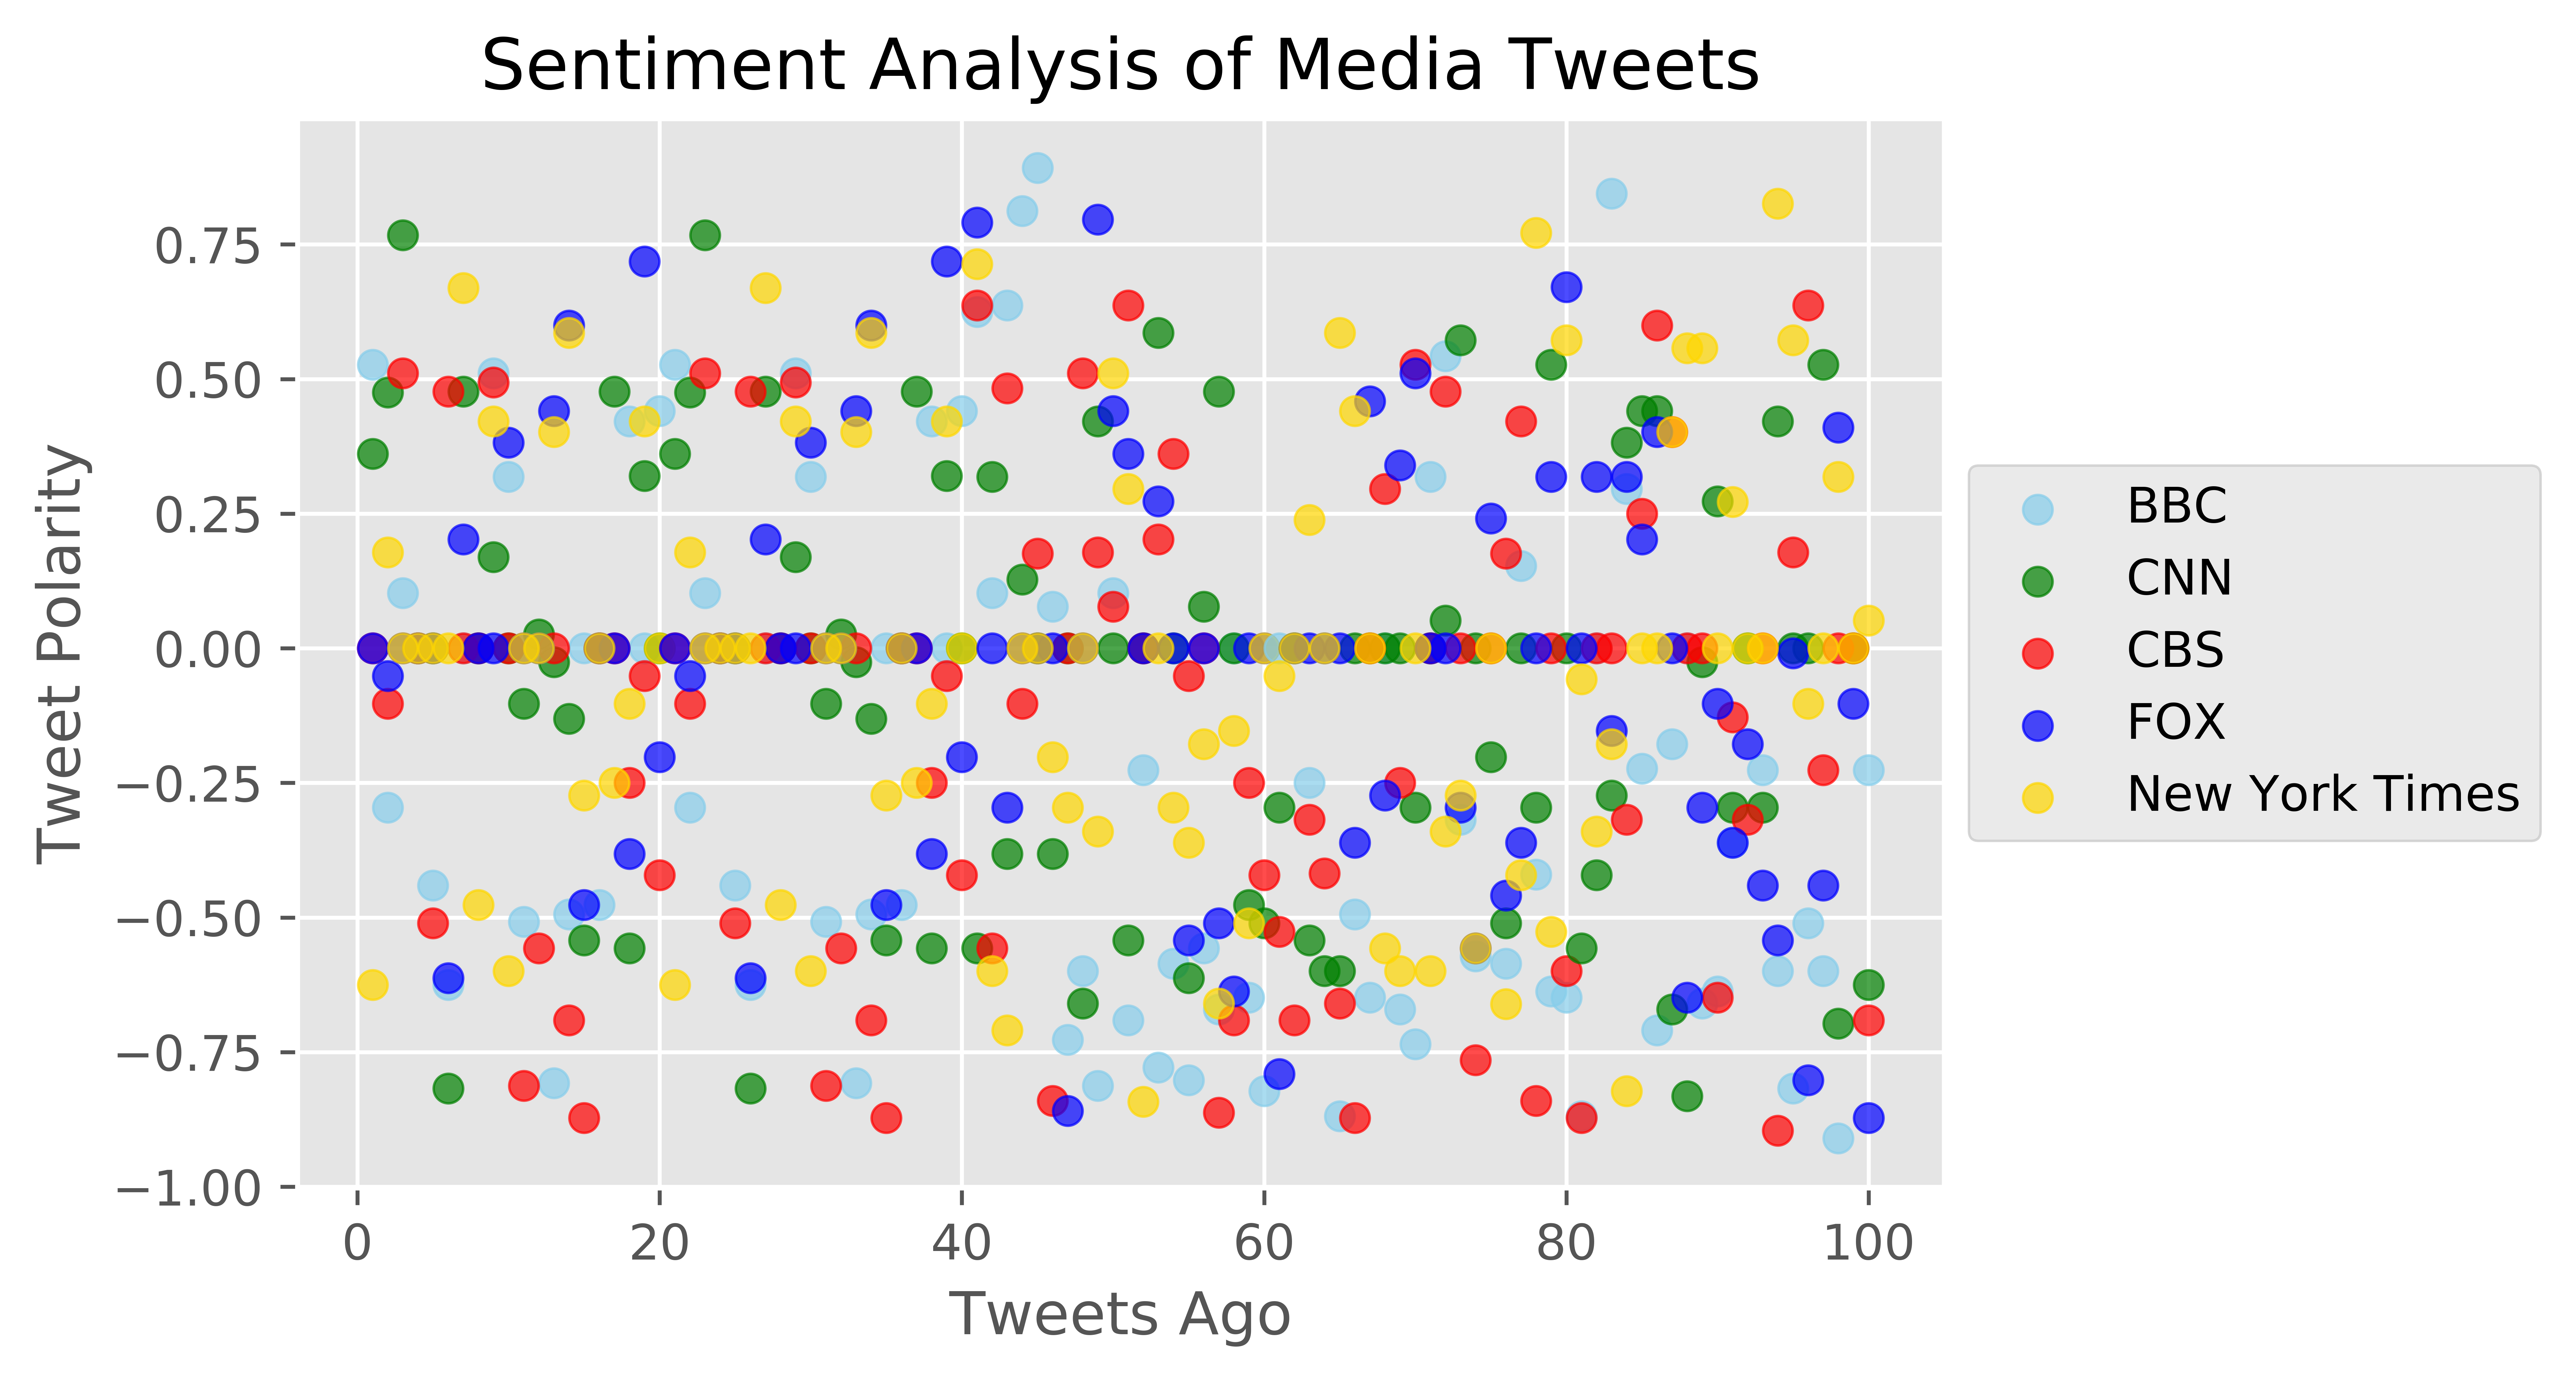

In [6]:
# Plot each tweet into a scatter plot
plt.figure(dpi=1200)
plt.style.use('ggplot')

#counter
counter_bbc=0
counter_cnn=0
counter_cbs=0
counter_fox=0
counter_nyt=0


# different plots for each network
for index, row in sentiment_df.iterrows():
    
    if (row["network_source"]=="BBC News (World)"):
        counter_bbc = counter_bbc+1
        BBC = plt.scatter(counter_bbc,row["compound_score"],c ='skyblue',marker="o",alpha=0.7)
    if (row["network_source"]=="CBS News"):
        counter_cbs = counter_cbs+1
        CBS = plt.scatter(counter_cbs,row["compound_score"],c ='green',marker="o",alpha=0.7)
    if (row['network_source']=="CNN"):
        counter_cnn = counter_cnn+1
        CNN = plt.scatter(counter_cnn,row["compound_score"],c ='red',marker="o",alpha=0.7)
    if (row["network_source"]=="Fox News"):
        counter_fox = counter_fox+1
        FOX = plt.scatter(counter_fox,row["compound_score"],c ='b',marker="o",alpha=0.7)
    if (row["network_source"]=="The New York Times"):
        counter_nyt = counter_nyt+1
        NYT = plt.scatter(counter_nyt,row["compound_score"],c ='gold',marker="o",alpha=0.7)    

# show graph
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets")
plt.grid(True)
plt.legend(handles = [BBC,CBS,CNN,FOX,NYT], 
           labels = ["BBC","CNN","CBS","FOX","New York Times"], 
           loc='center left', 
           bbox_to_anchor=(1, 0.5))

#legend didn't save correctly on the output file... 
plt.savefig("Tweet_Scatter", dpi=1200)
plt.show()

## Sentiment Bar Graph

In [7]:
grouped_media_comp=sentiment_df.groupby('network_source').mean()
grouped_media_comp.drop(grouped_media_comp.columns[[1,2,3]], axis=1, inplace=True)

In [8]:
grouped_media_comp.head()

compound_score
network_source                    
BBC News (World)         -0.195491
CBS News                 -0.047241
CNN                      -0.121656
Fox News                 -0.028053
The New York Times       -0.028502

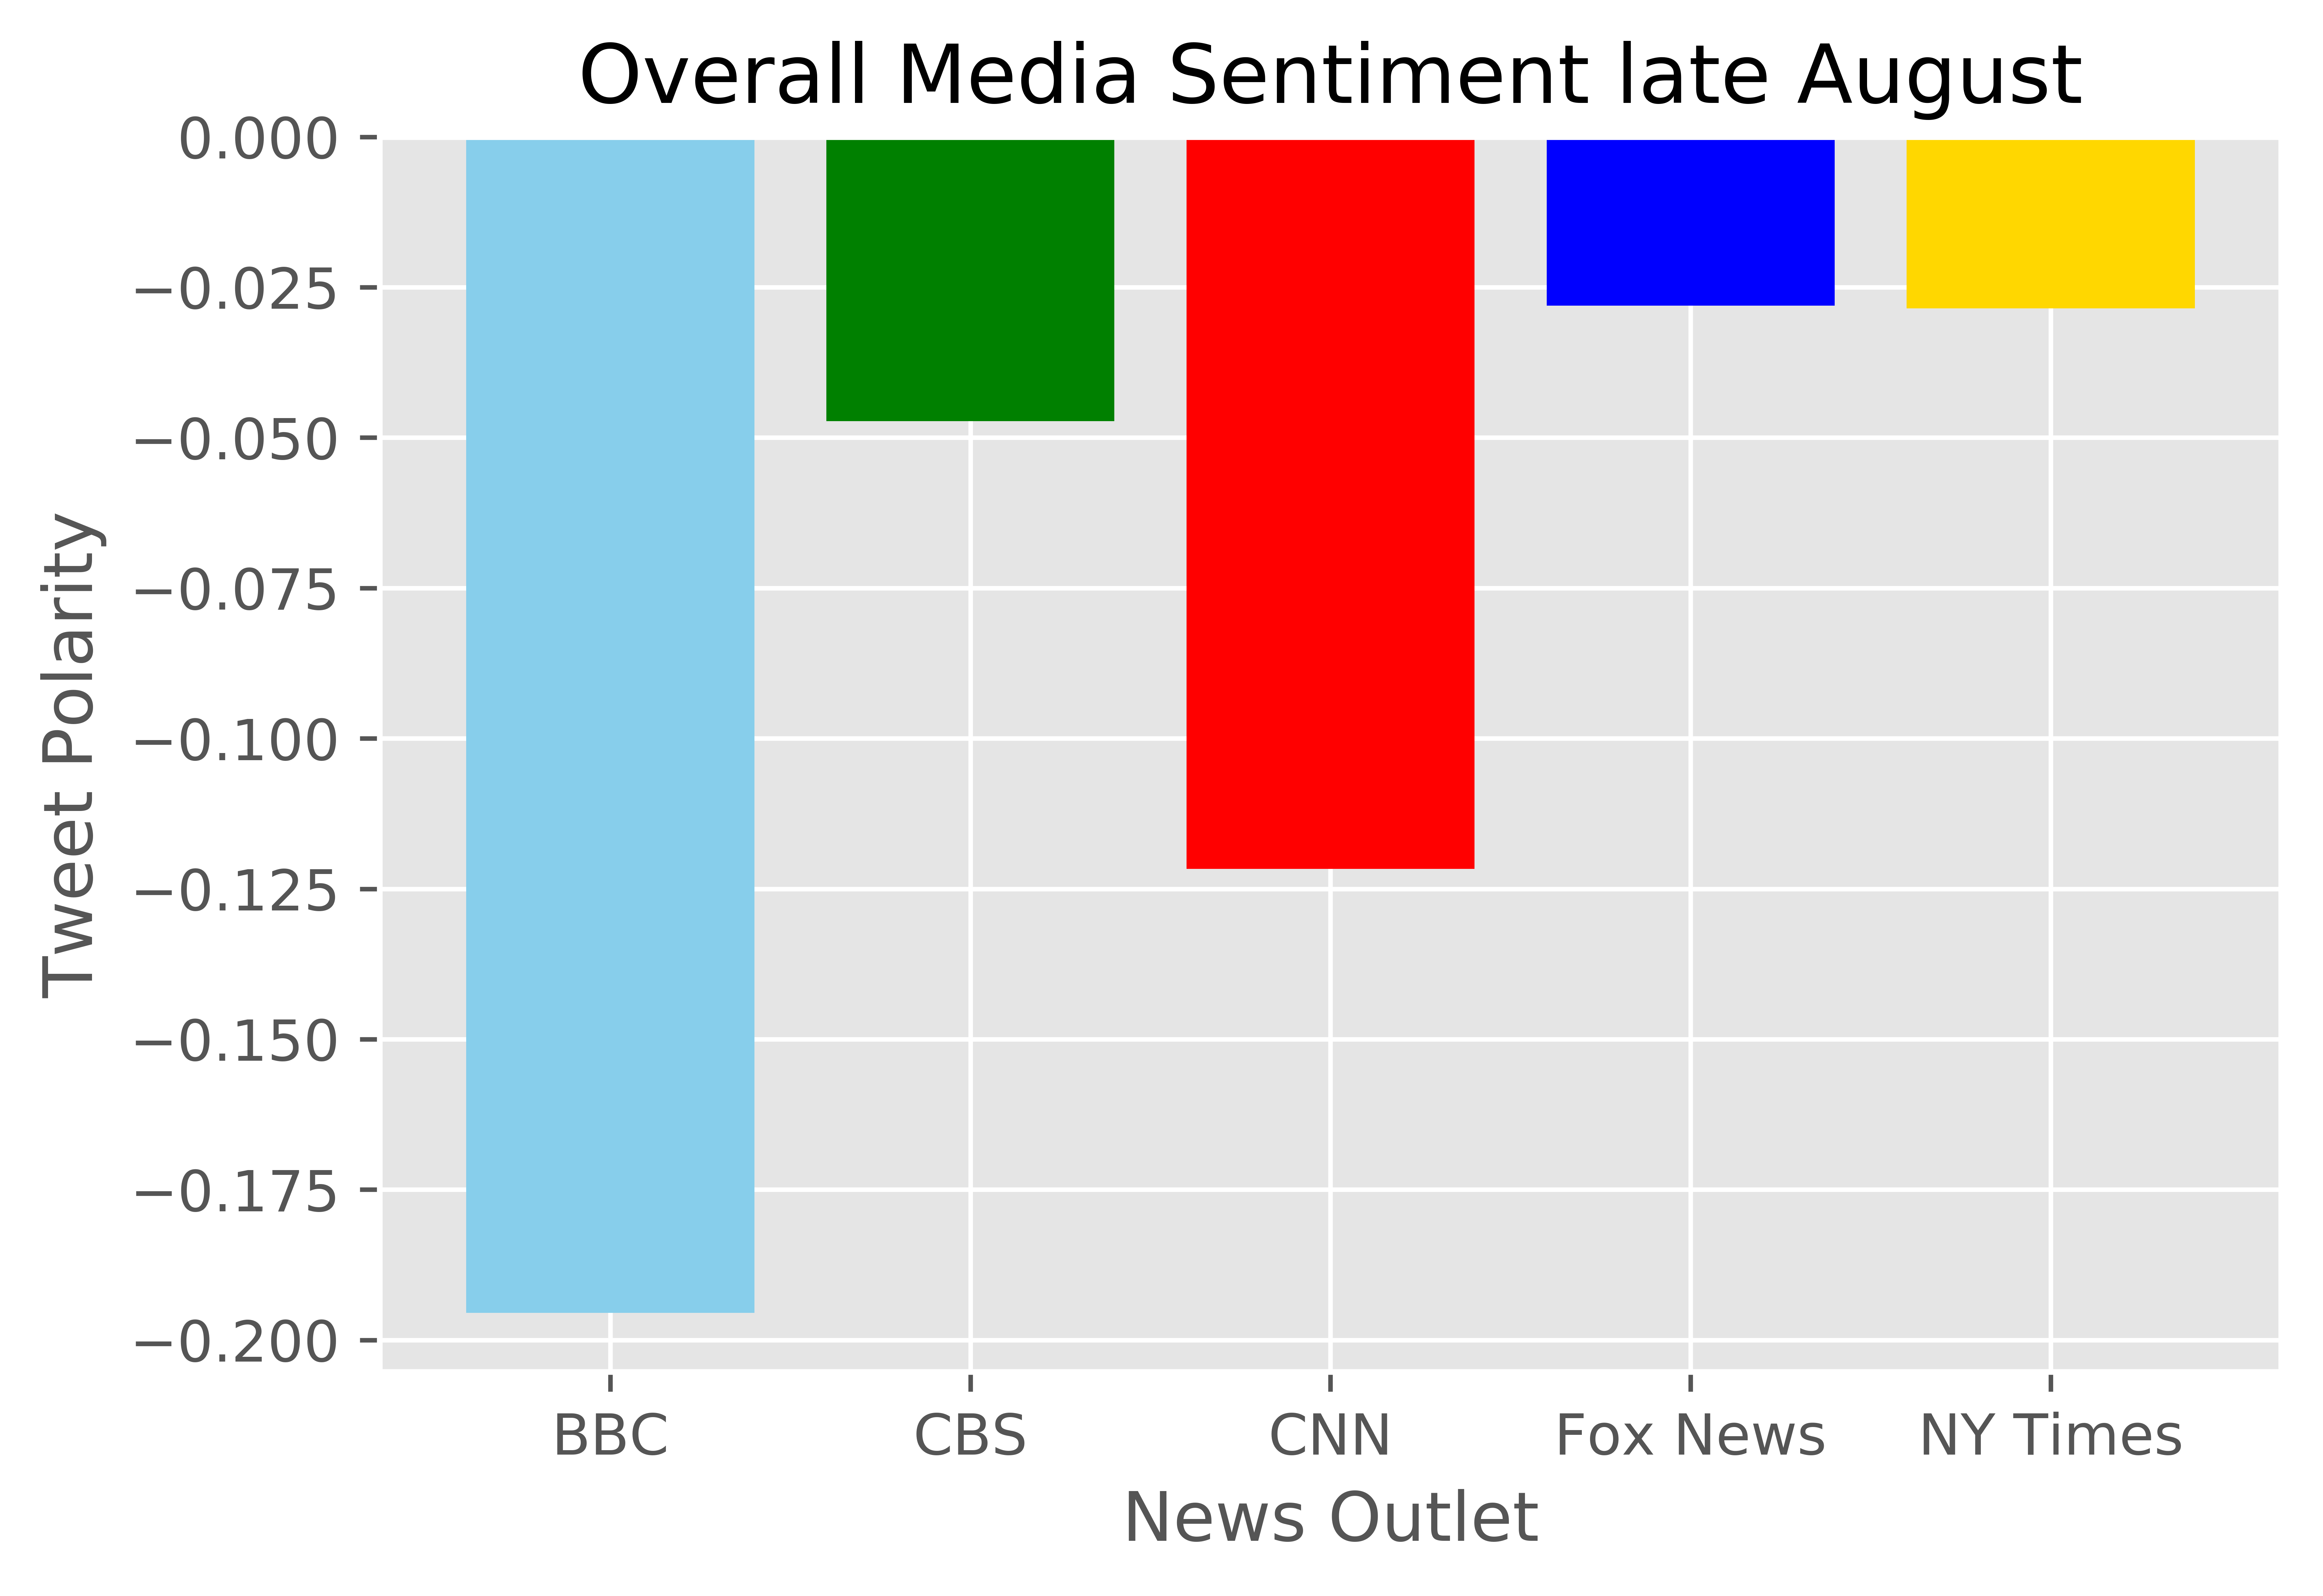

In [9]:
plt.figure(dpi=1200)

height = grouped_media_comp["compound_score"]
bars = ('BBC', 'CBS', 'CNN', 'Fox News', 'NY Times')
y_pos = np.arange(len(bars))
plt.title("Overall Media Sentiment late August")
plt.ylabel('Tweet Polarity')
plt.xlabel('News Outlet')
plt.grid(True)


plt.bar(y_pos, height, color=['skyblue', 'green', 'red', 'b', 'gold'])
plt.xticks(y_pos, bars)

plt.savefig("Tweet_Polarity", dpi=1200)
plt.show()